In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('C:/Users/zhangy30/Desktop/Data_MA415_local/high_diamond_ranked_10min.csv')
df.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Text(0, 0.5, 'redTotalGold')

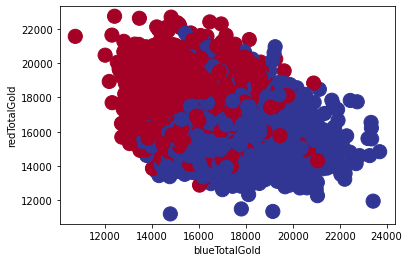

In [3]:
## The visualization for raw data
plt.scatter(df['blueTotalGold'], df['redTotalGold'], s=200, c=df['blueWins'], cmap='RdYlBu')
plt.xlabel('blueTotalGold')
plt.ylabel('redTotalGold')

In [4]:
df = df.drop(df.columns[0], axis = 1)    # drop the 'gameId' column

df = df[df['blueWardsPlaced'] <= 50]  # drop the edge cases, wards placed > 50
df = df[df['redWardsPlaced'] <= 50]

df = df.drop(['blueEliteMonsters', 'blueGoldPerMin', 'redFirstBlood', 'redKills',
              'redDeaths', 'redEliteMonsters', 'redGoldDiff', 'redGoldPerMin'], axis = 1)
df.shape

(8780, 31)

In [5]:
X = df.drop('blueWins', axis = 1)
y = df.blueWins

X = (X - X.mean())/X.std()

Text(0, 0.5, 'redTotalGold')

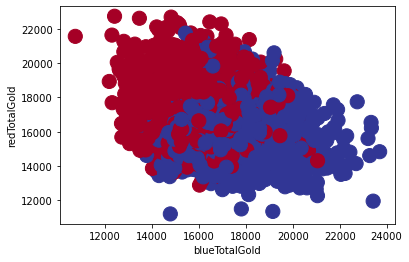

In [6]:
plt.scatter(df['blueTotalGold'], df['redTotalGold'], s=200, c=df['blueWins'], cmap='RdYlBu')
plt.xlabel('blueTotalGold')
plt.ylabel('redTotalGold')

## Visualization

In [7]:
df.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redExperienceDiff,redCSPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,0,0,16567,6.8,17047,197,55,8,19.7
1,0,12,1,0,5,5,5,0,0,0,...,1,1,1,17620,6.8,17438,240,52,1173,24.0
2,0,15,0,0,7,11,4,1,0,0,...,0,0,0,17285,6.8,17254,203,28,1033,20.3


,PC-1,PC-2,y
0,-0.320961,2.651280,0.0
1,3.432085,0.816639,0.0
2,1.950004,3.558523,0.0
3,1.005249,-0.505775,0.0
4,-0.500413,-1.509824,NaN
...,...,...,...
8775,0.172134,-1.924395,NaN
8776,-3.566457,2.225278,0.0
8777,-2.797788,-0.551350,0.0
8778,3.488983,-1.194691,1.0


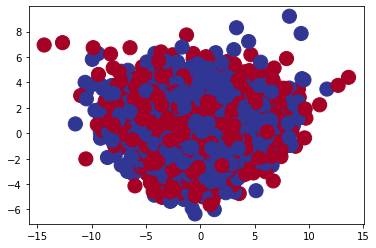

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

cols = ['PC-'+str(i+1) for i in range(2)]
X_pca = pd.DataFrame(X_pca,columns=cols)
X_pca['y'] = df['blueWins']
display(X_pca)

plt.scatter(X_pca['PC-1'], X_pca['PC-2'], s=200, c=X_pca['y'], cmap='RdYlBu')
# plt.legend(['a','b'])
# groups = X_pca.groupby('y')
# for name, group in groups:
#     plt.plot(group['PC-1'], group['PC-2'], marker='o', linestyle='', markersize=12, label=name)
# plt.legend()

## KNN Analysis

In [9]:
df.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redExperienceDiff,redCSPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,0,0,16567,6.8,17047,197,55,8,19.7
1,0,12,1,0,5,5,5,0,0,0,...,1,1,1,17620,6.8,17438,240,52,1173,24.0
2,0,15,0,0,7,11,4,1,0,0,...,0,0,0,17285,6.8,17254,203,28,1033,20.3


In [10]:
(train, test) = train_test_split(df, train_size = 0.8, test_size=0.2, shuffle = True, stratify = df['blueWins'], random_state=0)
X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]

y_train = train.iloc[:,0]
y_test = test.iloc[:, 0]

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# display(X_train)
display(y_train)

knn = KNeighborsClassifier()

K = np.arange(100) + 1
grid = {"n_neighbors": K}

knnCV = GridSearchCV(knn, param_grid=grid, return_train_score=True, n_jobs=-1)
knnCV.fit(X_train, y_train)

knnbest= knnCV.best_estimator_

yh = knnCV.predict(X_test)


6877    0
7848    1
2826    1
1281    1
6487    1
       ..
9146    1
8348    1
9043    0
8844    1
699     1
Name: blueWins, Length: 7024, dtype: int64

{'n_neighbors': 72}

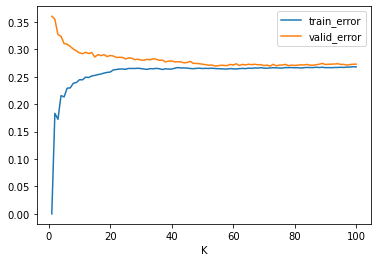

In [25]:
results = pd.DataFrame()
results['K'] = K
results['train_error'] = 1 - knnCV.cv_results_['mean_train_score']
results['valid_error'] = 1 - knnCV.cv_results_['mean_test_score']   
# test_score does not mean test set, it is the validation set

ax1 = results.plot.line(x = 'K', y = 'train_error')
results.plot.line(x = 'K', y = 'valid_error', ax = ax1)

display(knnCV.best_params_)

In [11]:
yh.shape

(1756,)

In [13]:
yh[2]
y_test.iloc[1]

1

In [14]:
mis = y_test.iloc[1]
newk = np.append(mis, X_test[1])

newk = pd.Series(newk, index=df.columns)


mmm = pd.DataFrame(columns=df.columns)
mmm = mmm.append(newk, ignore_index=True)
mmm
display(newk.dtype)
display(newk)


dtype('float64')

blueWins                        1.000000
blueWardsPlaced                 0.156519
blueWardsDestroyed             -0.845471
blueFirstBlood                  0.990647
blueKills                       0.264508
blueDeaths                     -0.047254
blueAssists                     0.335306
blueDragons                     1.323357
blueHeralds                    -0.475215
blueTowersDestroyed            -0.205341
blueTotalGold                  -0.054936
blueAvgLevel                   -0.374921
blueTotalExperience            -0.594758
blueTotalMinionsKilled         -0.528150
blueTotalJungleMinionsKilled    0.554562
blueGoldDiff                    0.059453
blueExperienceDiff              0.084080
blueCSPerMin                   -0.528150
redWardsPlaced                 -0.957379
redWardsDestroyed              -0.336711
redAssists                      1.081533
redDragons                     -0.841282
redHeralds                     -0.434854
redTowersDestroyed             -0.198501
redTotalGold    

In [15]:
mistake = pd.DataFrame(columns=df.columns)
o = 1
for i in np.arange(1755)+1:
    if (yh[i] != y_test.iloc[i]):
        mis = y_test.iloc[i]
        newm = np.append(mis, X_test[i])
        newm = pd.Series(newm, index=df.columns)
        mistake = mistake.append(newm, ignore_index=True)
#         print(mistake.shape)
        o += 1
display(mistake.head(3))
mistake.shape

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redExperienceDiff,redCSPerMin
0,0.0,2.390797,1.027458,0.990647,-0.400098,-0.738011,-0.158445,-0.755654,-0.475215,-0.205341,...,1.188662,-0.434854,-0.198501,-1.187426,-1.050907,-0.906037,-2.013787,2.362763,-0.985348,-2.013787
1,1.0,-0.215861,1.027458,0.990647,-0.067795,-0.047254,-0.158445,-0.755654,-0.475215,-0.205341,...,-0.841282,-0.434854,-0.198501,-0.098341,-0.400606,-0.841227,-0.064363,0.178223,-0.224463,-0.064363
2,1.0,3.011430,0.559226,-1.009441,-0.400098,0.643504,-0.652195,-0.755654,-0.475215,-0.205341,...,1.188662,-0.434854,-0.198501,0.503859,0.899997,0.521451,0.751675,-0.318263,-0.396158,0.751675


(500, 31)

Text(0, 0.5, 'redTotalGold')

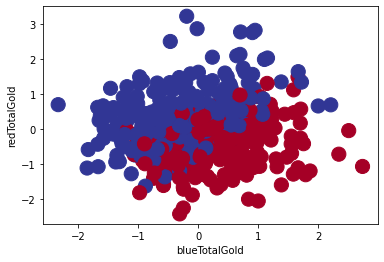

In [16]:
plt.scatter(mistake['blueTotalGold'], mistake['redTotalGold'], s=200, c=mistake['blueWins'], cmap='RdYlBu')
plt.xlabel('blueTotalGold')
plt.ylabel('redTotalGold')

Text(0, 0.5, 'redTotalGold')

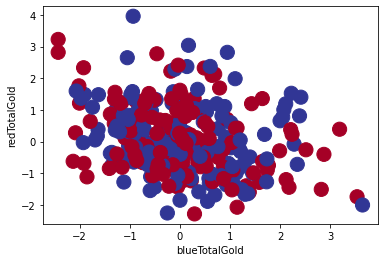

In [21]:
X_test = pd.DataFrame(X_test, columns=X.columns)
y_test = pd.DataFrame(y_test, columns=['blueWins'])
trsss = pd.concat([X_test, y_test], axis=1)



plt.scatter(trsss['blueTotalGold'], trsss['redTotalGold'], s=200, c=trsss['blueWins'], cmap='RdYlBu')
plt.xlabel('blueTotalGold')
plt.ylabel('redTotalGold')

In [23]:
trsss.shape

(3186, 31)